In [ ]:
# Import files from google drive
from google.colab import files
uploaded = files.upload()

Saving Dataset1.zip to Dataset1.zip
Saving Dataset2.zip to Dataset2.zip
Saving Dataset3.zip to Dataset3.zip
Saving Dataset4.zip to Dataset4.zip
Saving Dataset5.zip to Dataset5.zip
Saving Dataset6.zip to Dataset6.zip
Saving Dataset7.zip to Dataset7.zip
Saving Dataset8.zip to Dataset8.zip
Saving Dataset9.zip to Dataset9.zip
Saving Dataset10.zip to Dataset10.zip


In [ ]:
# Unzip each subject dataset individually
!unzip Dataset1
!unzip Dataset2
!unzip Dataset3
!unzip Dataset4
!unzip Dataset5
!unzip Dataset6
!unzip Dataset7
!unzip Dataset8
!unzip Dataset9
!unzip Dataset10

Archive:  Dataset1.zip
  inflating: Datasett/mHealth_subject1.log  
Archive:  Dataset2.zip
  inflating: Dataset2/mHealth_subject2.log  
Archive:  Dataset3.zip
  inflating: Dataset3/mHealth_subject3.log  
Archive:  Dataset4.zip
  inflating: Dataset4/mHealth_subject4.log  
Archive:  Dataset5.zip
  inflating: Dataset5/mHealth_subject5.log  
Archive:  Dataset6.zip
  inflating: Dataset6/mHealth_subject6.log  
Archive:  Dataset7.zip
  inflating: Dataset7/mHealth_subject7.log  
Archive:  Dataset8.zip
  inflating: Dataset8/mHealth_subject8.log  
Archive:  Dataset9.zip
  inflating: Dataset9/mHealth_subject9.log  
Archive:  Dataset10.zip
  inflating: Dataset10/mHealth_subject10.log  


In [ ]:
# Import relevant libraries
import numpy as np
import pandas as pd
from tqdm import tqdm
import _pickle as cPickle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pickle
import sys
import os

# Load file and folder of each dataset individually
# Comment out the other 9 when you want to use one subjects data

#files=os.listdir("Datasett/")
#folder="Datasett/"

files=os.listdir("Dataset2/")
folder="Dataset2/"

#files=os.listdir("Dataset3/")
#folder="Dataset3/"

#files=os.listdir("Dataset4/")
#folder="Dataset4/"

#files=os.listdir("Dataset5/")
#folder="Dataset5/"

#files=os.listdir("Dataset6/")
#folder="Dataset6/"

#files=os.listdir("Dataset7/")
#folder="Dataset7/"

#files=os.listdir("Dataset8/")
#folder="Dataset8/"

#files=os.listdir("Dataset9/")
#folder="Dataset9/"

#files=os.listdir("Dataset10/")
#folder="Dataset10/"

In [ ]:
features=[]
labels=[]

#loop over all files to get features and labels
with tqdm(total=len(files)) as pbar:
    for f1 in files:
        name=folder+f1
        f = open(name, 'r')
        x=f.readline()
        while(x):
            x=x.split()
            labels.append(int(x[-1]))
            del x[-1]
            sublist=[]
            for val in x:
                sublist.append(val)
            features.append(np.array(sublist))
            x=f.readline()
        pbar.update(1)

# Convert to an array
features=np.array(features)
labels=np.array(labels)

# Print shape of features and labels
print(features.shape)
print(labels.shape)

# Print unique labels
print(np.unique(labels))

#saving for future use
with open("features", 'wb') as fp:
    pickle.dump(features, fp)

with open("labels", 'wb') as fp:
    pickle.dump(labels, fp)

100%|██████████| 1/1 [00:01<00:00,  1.50s/it]


(130561, 23)
(130561,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12]


In [ ]:
# Define libraries
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import csv
from matplotlib import style
import string
from collections import Counter
import sys
import pickle
import glob
from keras.layers import Dense
from keras.layers import SeparableConv1D,MaxPooling1D
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import csv
from matplotlib import style
import string
from collections import Counter
import sys
import pickle
import glob
from sklearn.cluster import dbscan, DBSCAN
from sklearn import metrics

#getting data
with open('features', 'rb') as fp:
    X=pickle.load(fp)

with open('labels', 'rb') as fp:
    y=pickle.load(fp)

In [ ]:
# ONLINE CODE STARTS HERE

import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

In [ ]:
# Compute DBSCAN

X = StandardScaler().fit_transform(X)
# so far 3 60 3 is best as it gives good amount of clusters
db = DBSCAN(eps=3, min_samples=60, n_jobs=3).fit(X)
# Return an array of zeros with same shape and type to db.labels_
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Identifies the number of clusters in labels
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# Ignore noise if detected
n_noise_ = list(labels).count(-1)

In [ ]:
# Print summary of DBSCAN Results

# https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html
print('DBSCAN Clustering Results: Subject 2')
# Print estimated number of clusters
print('Estimated number of clusters: %d' % n_clusters_)
# Print estimated number of noise points
print('Estimated number of noise points: %d' % n_noise_)
# Print Homogeneity
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
# Print Completeness
print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
# Print V-measure
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
# Print Adjust Rand Index
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y, labels))
# Print Adjusted Mutual Information
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y, labels,
                                           average_method='arithmetic'))
# Print Silhouette Coefficient
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

DBSCAN Clustering Results: Subject 2
Estimated number of clusters: 11
Estimated number of noise points: 11640
Homogeneity: 0.202
Completeness: 0.420
V-measure: 0.273
Adjusted Rand Index: 0.207
Adjusted Mutual Information: 0.273
Silhouette Coefficient: 0.087


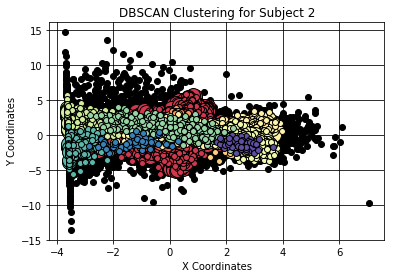

In [ ]:

# https://plot.ly/scikit-learn/plot-dbscan/

# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = np.unique(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'black'

    class_member_mask = (labels == k)
    
    # class_member_mask = False data points e.g NOISE
    # core_samples_mask = True data points
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', 
             markeredgecolor='k', markersize=14, color=col)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', 
             markeredgecolor='k', markersize=6, color=col)
    
plt.title('DBSCAN Clustering for Subject 2')
plt.rc('grid', linestyle="-", color='black')

#plt.legend(loc='best', bbox_to_anchor=(1, 0.5), title = "Number of Clusters = 11")

plt.ylabel('Y Coordinates')
plt.xlabel('X Coordinates')

plt.grid(True)
plt.show()